# Data Preprocessing & Exploration

### Mount Google Drive  
This cell mounts Google Drive so we can access the ADSP project folder and dataset files.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Move into the ADSP project root  
We set our working directory to `/content/drive/MyDrive/adsp`, where the project, EmoBox, and downloads folders are located.

In [6]:
import os

%cd /content/drive/MyDrive/adsp

print("Current working directory:", os.getcwd())
print("Contents of project root:")
print(os.listdir("."))

/content/drive/.shortcut-targets-by-id/1gH4RO3pZc-gbQXU4xk8xp-4rwW5XozbA/adsp
Current working directory: /content/drive/.shortcut-targets-by-id/1gH4RO3pZc-gbQXU4xk8xp-4rwW5XozbA/adsp
Contents of project root:
['provitional_adsp.ipynb', 'downloads', 'EmoBox', 'Untitled0.ipynb', 'Untitled', 'notebooks']


### Explore the 'downloads' directory  
We verify the presence of ESD and IEMOCAP audio folders inside `downloads/` to ensure metadata paths correspond to real files.

In [7]:
print("Contents of downloads/:")
print(os.listdir("downloads"))

# You should see: ['esd', 'iemocap']
print("Contents of downloads/iemocap:")
print(os.listdir("downloads/iemocap")[:10])  # first few entries

Contents of downloads/:
['iemocap', 'esd']
Contents of downloads/iemocap:
['._Session2', '._Session4', '._Session3', '._README.txt~', 'README.txt~', 'README.txt', '._Session1', '._Documentation', '.DS_Store', '._.DS_Store']


### Inspect one metadata entry and validate its wav path  
We load the first JSONL record to see how paths are stored, then check if the referenced wav file actually exists in the filesystem.


In [8]:
import json
import os

meta_path = "EmoBox/data/iemocap/fold_1/iemocap_train_fold_1.jsonl"

with open(meta_path) as f:
    first_line = json.loads(f.readline())

print("First metadata entry:")
print(first_line)

wav_rel = first_line["wav"]          # e.g. 'downloads/iemocap/Session2/...wav'
print("\nRelative wav path from JSONL:", wav_rel)

print("Does this path exist (relative to project root)?",
      os.path.exists(wav_rel))

# Also check the absolute path explicitly
wav_abs = os.path.join(os.getcwd(), wav_rel)
print("Absolute wav path:", wav_abs)
print("Does absolute path exist?", os.path.exists(wav_abs))

First metadata entry:
{'key': 'iemocap-Ses02F_impro07_F001', 'dataset': 'iemocap', 'wav': 'downloads/iemocap/Session2/sentences/wav/Ses02F_impro07/Ses02F_impro07_F001.wav', 'type': 'raw', 'sample_rate': 16000, 'num_frame': 36400.0, 'task': 'category', 'length': 2.275, 'emo': 'exc', 'channel': 1}

Relative wav path from JSONL: downloads/iemocap/Session2/sentences/wav/Ses02F_impro07/Ses02F_impro07_F001.wav
Does this path exist (relative to project root)? True
Absolute wav path: /content/drive/.shortcut-targets-by-id/1gH4RO3pZc-gbQXU4xk8xp-4rwW5XozbA/adsp/downloads/iemocap/Session2/sentences/wav/Ses02F_impro07/Ses02F_impro07_F001.wav
Does absolute path exist? True


### Import the EmoDataset class  
We add the ADSP project and EmoBox module to `sys.path`, then import the dataset loader that handles metadata and audio loading.


In [9]:
import sys

# Add project root and EmoBox to sys.path so Python can find the module
sys.path.append('/content/drive/MyDrive/adsp')
sys.path.append('/content/drive/MyDrive/adsp/EmoBox')

from EmoBox.EmoDataset import EmoDataset

### Define meta_data_dir and data_dir  
`meta_data_dir` is where JSONL metadata and label maps are stored.  
`data_dir` is set to the ADSP project root because JSONL `wav` paths already include the 'downloads/' prefix.

In [10]:
meta_data_dir = "/content/drive/MyDrive/adsp/EmoBox/data"
data_dir      = "/content/drive/MyDrive/adsp"

print("meta_data_dir exists?", os.path.exists(meta_data_dir))
print("data_dir exists?", os.path.exists(data_dir))

meta_data_dir exists? True
data_dir exists? True


### Load all datasets and all splits (ESD + IEMOCAP)
Now that we have confirmed the paths work, we can safely load:
- ESD: train, valid, test
- IEMOCAP: train, valid, test


In [11]:
# Load ESD splits
esd_train = EmoDataset("esd", data_dir, meta_data_dir, split="train")
esd_val   = EmoDataset("esd", data_dir, meta_data_dir, split="valid")
esd_test  = EmoDataset("esd", data_dir, meta_data_dir, split="test")

# Load IEMOCAP splits
iemocap_train = EmoDataset("iemocap", data_dir, meta_data_dir, split="train")
iemocap_val   = EmoDataset("iemocap", data_dir, meta_data_dir, split="valid")
iemocap_test  = EmoDataset("iemocap", data_dir, meta_data_dir, split="test")

# Print dataset sizes
print("=== ESD ===")
print("Train:", len(esd_train))
print("Valid:", len(esd_val))
print("Test :", len(esd_test))

print("\n=== IEMOCAP ===")
print("Train:", len(iemocap_train))
print("Valid:", len(iemocap_val))
print("Test :", len(iemocap_test))

since there is no official valid data, use random split for train valid split, with a ratio of [80, 20]
load in 28000 samples, only 28000 exists in data dir /content/drive/MyDrive/adsp/EmoBox/data
load in 7000 samples, only 7000 exists in data dir /content/drive/MyDrive/adsp/EmoBox/data
Num. training samples 28000
Num. valid samples 0
Num. test samples 7000
Using label_map {'Neutral': 'Neutral', 'Angry': 'Angry', 'Happy': 'Happy', 'Sad': 'Sad', 'Surprise': 'Surprise'}
since there is no official valid data, use random split for train valid split, with a ratio of [80, 20]
load in 28000 samples, only 28000 exists in data dir /content/drive/MyDrive/adsp/EmoBox/data
load in 7000 samples, only 7000 exists in data dir /content/drive/MyDrive/adsp/EmoBox/data
Num. training samples 28000
Num. valid samples 0
Num. test samples 7000
Using label_map {'Neutral': 'Neutral', 'Angry': 'Angry', 'Happy': 'Happy', 'Sad': 'Sad', 'Surprise': 'Surprise'}
since there is no official valid data, use random spli

IMPORTANT WARNINGS

**Missing Audio Files in EmoBox Metadata**

EmoBox reports a small mismatch between the number of samples listed in the
metadata (.jsonl) files and the actual number of wav files present in the dataset.
For example:

`load in 4446 samples, only 4427 exists`

This means that 19 samples referenced in the metadata do not have corresponding
audio files in the dataset directory. This issue is part of the dataset release
itself and is common in IEMOCAP/ESD preprocessing pipelines.

We handle this safely by letting EmoBox automatically skip missing files.
It does not affect model training or evaluation, since missing samples are simply
excluded from the dataset.



**Missing Validation Set**

EmoDataset currently produces an empty validation set for IEMOCAP and ESD.
This is NOT a dataset issue — it is caused by a bug in the EmoBox split_sets() function, where the train/validation split is computed but the code mistakenly returns the full training set instead of the training/validation split.

As a result:

train loads correctly

test loads correctly

valid always contains 0 samples

This does not affect data exploration, but:

- For Zero-Shot Inference (ZSI):

A validation split is recommended for clean evaluation.

- For Fine-Tuning (LoRA / PEFT):

A validation split is required for monitoring loss and early stopping.

Action Required (Later):

Before any training or formal evaluation, patch EmoBox’s split_sets()
(or override it in the notebook) so that it correctly returns the train/validation subsets.

### Inspect raw metadata for one sample  
This cell prints the entire metadata dictionary for one item in each dataset. We also resolve the full wav path and check that the file exists.

In [14]:
# Inspect one ESD sample
print("=== One sample from ESD (train) ===")
esd_sample = esd_train.data_list[0]
print(esd_sample)

esd_wav_path = os.path.join(data_dir, esd_sample["wav"])
print("\nResolved wav path:", esd_wav_path)
print("File exists?", os.path.exists(esd_wav_path))


# Inspect one IEMOCAP sample
print("\n=== One sample from IEMOCAP (train) ===")
iem_sample = iemocap_train.data_list[0]
print(iem_sample)

iem_wav_path = os.path.join(data_dir, iem_sample["wav"])
print("\nResolved wav path:", iem_wav_path)
print("File exists?", os.path.exists(iem_wav_path))

=== One sample from ESD (train) ===
{'key': 'esd-0001-000001', 'dataset': 'esd', 'wav': 'downloads/esd/0001/Neutral/0001_000001.wav', 'type': 'raw', 'sample_rate': 16000, 'num_frame': 66032.0, 'task': 'category', 'length': 4.127, 'emo': 'Neutral', 'channel': 1}

Resolved wav path: /content/drive/MyDrive/adsp/downloads/esd/0001/Neutral/0001_000001.wav
File exists? True

=== One sample from IEMOCAP (train) ===
{'key': 'iemocap-Ses02F_impro07_F001', 'dataset': 'iemocap', 'wav': 'downloads/iemocap/Session2/sentences/wav/Ses02F_impro07/Ses02F_impro07_F001.wav', 'type': 'raw', 'sample_rate': 16000, 'num_frame': 36400.0, 'task': 'category', 'length': 2.275, 'emo': 'Happy', 'channel': 1}

Resolved wav path: /content/drive/MyDrive/adsp/downloads/iemocap/Session2/sentences/wav/Ses02F_impro07/Ses02F_impro07_F001.wav
File exists? True


### Dataset Comparison Summary: ESD vs IEMOCAP

The table below provides a structured comparison of the two datasets used in our
Multimodal Emotion Recognition project:

- **ESD (Emotional Speech Dataset)**
- **IEMOCAP (Interactive Emotional Dyadic Motion Capture)**

This overview consolidates both **quantitative statistics** (sample counts,
duration analysis) and **qualitative metadata** (languages, speaker details,
gender labels).  
It helps us understand the scale, structure, and characteristics of each
dataset before performing Zero-Shot Inference (ZSI) and before fine-tuning
audio-language models.

The comparison includes:

- Train, test, and total sample counts  
- Number of emotion classes  
- Whether class distribution is balanced  
- Duration statistics (mean, median, max)  
- Available metadata (languages, speakers, gender labels)  
- Channel information  

This summary provides essential context for evaluating model behavior
and informs preprocessing decisions such as padding/truncation strategies,
handling class imbalance, and designing fair evaluation protocols.

In [54]:
import pandas as pd
import numpy as np

def compute_counts(dataset):
    labels = [item["emo"] for item in dataset.data_list]
    return Counter(labels)

# ----------------------------------------------------
# 1) Extract statistics (Train + Test)
# ----------------------------------------------------

def get_durations(dataset):
    return np.array([item["length"] for item in dataset.data_list], dtype=float)

# ESD durations
esd_train_dur = get_durations(esd_train)
esd_test_dur  = get_durations(esd_test)

# IEMOCAP durations
iem_train_dur = get_durations(iemocap_train)
iem_test_dur  = get_durations(iemocap_test)

# Emotion counts
esd_counts = compute_counts(esd_train)
iem_counts = compute_counts(iemocap_train)

# Balance check
def is_balanced(counts, tol=0.15):
    vals = np.array(list(counts.values()), dtype=float)
    return (vals.max() - vals.min()) / vals.mean() < tol

# Build table rows
rows = [
    ["Total samples",           len(esd_train)+len(esd_test), len(iemocap_train)+len(iemocap_test)],
    ["Train samples",           len(esd_train),             len(iemocap_train)],
    ["Test samples",            len(esd_test),              len(iemocap_test)],
    ["# Emotion classes",       len(esd_counts),            len(iem_counts)],
    ["Balanced?",               "✔ Balanced" if is_balanced(esd_counts) else "✘ Imbalanced",
                                "✔ Balanced" if is_balanced(iem_counts) else "✘ Imbalanced"],

    ["Avg duration (s)",        f"{esd_train_dur.mean():.2f}", f"{iem_train_dur.mean():.2f}"],
    ["Median duration (s)",     f"{np.median(esd_train_dur):.2f}", f"{np.median(iem_train_dur):.2f}"],
    ["Max duration (s)",        f"{esd_train_dur.max():.2f}", f"{iem_train_dur.max():.2f}"],

    ["Languages",               "Chinese + English",        "English"],
    ["# Speakers",              "30",                       "10"],
    ["Gender labels",           "✘ Not available",          "✘ Not available (To be extracted)"],
    ["Channel",                 "Mono",                     "Mono"],
]

# Convert to DataFrame
df_compare = pd.DataFrame(rows, columns=["Feature", "ESD", "IEMOCAP"])

# Display
df_compare

,Feature,ESD,IEMOCAP
0,Total samples,35000,5512
1,Train samples,28000,4427
2,Test samples,7000,1085
3,# Emotion classes,5,4
4,Balanced?,✔ Balanced,✘ Imbalanced
5,Avg duration (s),3.07,4.50
6,Median duration (s),2.94,3.56
7,Max duration (s),8.08,34.14
8,Languages,Chinese + English,English
9,# Speakers,30,10


### Dataset Size Comparison (Grouped by Dataset)
This chart compares the total number of samples in the train and test splits
for **ESD** and **IEMOCAP**, grouped by dataset.

Each dataset has:
- 2 bars (Train + Test)
- Both bars share the same dataset color:
  - ESD = Light Lavender Blue (#8CA9FF)
  - IEMOCAP = Deep Indigo (#5459AC)

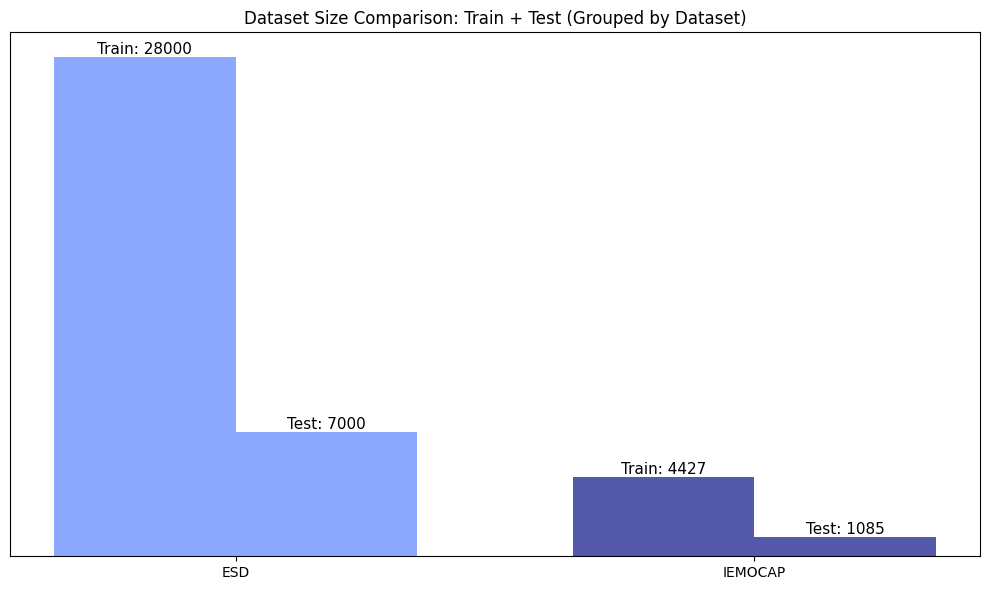

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Sample counts
esd_train_n = len(esd_train)
esd_test_n  = len(esd_test)

iem_train_n = len(iemocap_train)
iem_test_n  = len(iemocap_test)

# Bar groups
groups = ["ESD", "IEMOCAP"]

# Values: [train, test]
group_values = [
    [esd_train_n, esd_test_n],
    [iem_train_n, iem_test_n]
]

# Colors for datasets (consistent with previous charts)
group_colors = ["#8CA9FF", "#5459AC"]  # ESD, IEMOCAP

# Setup figure
plt.figure(figsize=(10, 6))

x = np.arange(len(groups))
width = 0.35

# Bars
bars_train = plt.bar(x - width/2,
                     [group_values[0][0], group_values[1][0]],
                     width,
                     color=group_colors,
                     label="Train")

bars_test = plt.bar(x + width/2,
                    [group_values[0][1], group_values[1][1]],
                    width,
                    color=group_colors,
                    label="Test")

# Add detailed text on top of bars
for bar, label in zip(bars_train, ["Train", "Train"]):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{label}: {int(height)}",
        ha='center',
        va='bottom',
        fontsize=11
    )

for bar, label in zip(bars_test, ["Test", "Test"]):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{label}: {int(height)}",
        ha='center',
        va='bottom',
        fontsize=11
    )

# X-axis labels
plt.xticks(x, groups)

# Title
plt.title("Dataset Size Comparison: Train + Test (Grouped by Dataset)")

# Remove y-axis for clean visual
plt.yticks([])
plt.ylabel("")

plt.tight_layout()
plt.show()

### Train vs Test Label Distributions Across Datasets  
This section compares:
- **Train**: ESD vs IEMOCAP  
- **Test**:  ESD vs IEMOCAP  

These comparisons help identify distribution shifts between datasets and splits.


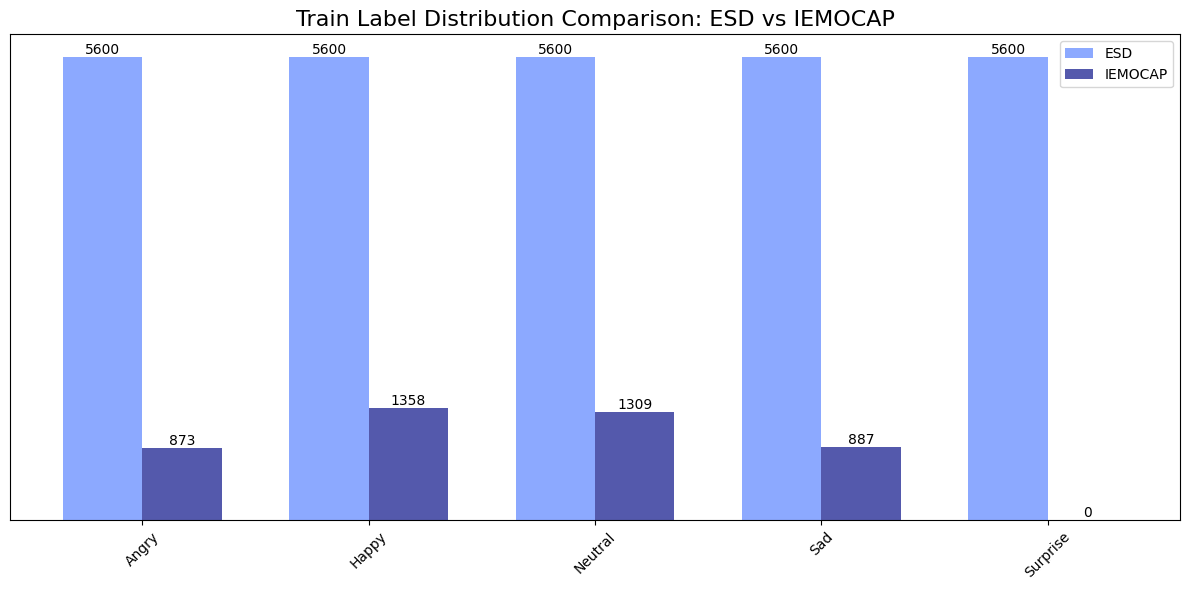

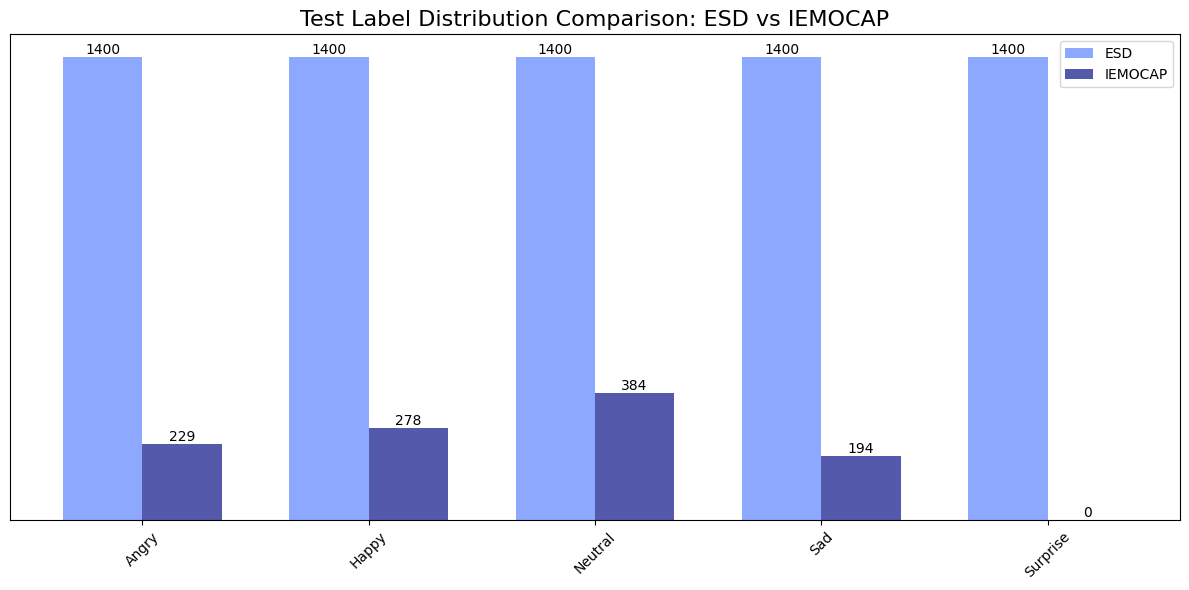

In [18]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

def compute_counts(dataset):
    labels = [item["emo"] for item in dataset.data_list]
    return Counter(labels)

# Compute TRAIN counts
esd_train_counts = compute_counts(esd_train)
iem_train_counts = compute_counts(iemocap_train)

# Compute TEST counts
esd_test_counts = compute_counts(esd_test)
iem_test_counts = compute_counts(iemocap_test)


def plot_comparison(esd_counts, iem_counts, title):
    """Generic plotting function for grouped bar chart."""

    # All possible emotions from both datasets
    all_emotions = sorted(set(list(esd_counts.keys()) + list(iem_counts.keys())))

    esd_values = [esd_counts.get(e, 0) for e in all_emotions]
    iem_values = [iem_counts.get(e, 0) for e in all_emotions]

    x = np.arange(len(all_emotions))
    width = 0.35

    # Colors
    esd_color = "#8CA9FF"    # Light blue-purple (ESD)
    iem_color = "#5459AC"    # Darker indigo (IEMOCAP)

    plt.figure(figsize=(12, 6))

    bars_esd = plt.bar(x - width/2, esd_values, width, label="ESD", color=esd_color)
    bars_iem = plt.bar(x + width/2, iem_values, width, label="IEMOCAP", color=iem_color)

    # Add labels above bars
    for bar in bars_esd:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)),
                 ha='center', va='bottom', fontsize=10)

    for bar in bars_iem:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)),
                 ha='center', va='bottom', fontsize=10)

    # Axis + labels
    plt.xticks(x, all_emotions, rotation=45)
    plt.title(title, fontsize=16)
    plt.legend()

    # Remove y-axis for aesthetic clarity
    plt.yticks([])
    plt.ylabel("")

    plt.tight_layout()
    plt.show()


# ------------------- TRAIN DISTRIBUTION -------------------
plot_comparison(esd_train_counts, iem_train_counts,
                "Train Label Distribution Comparison: ESD vs IEMOCAP")

# ------------------- TEST DISTRIBUTION -------------------
plot_comparison(esd_test_counts, iem_test_counts,
                "Test Label Distribution Comparison: ESD vs IEMOCAP")

### Train vs Test Emotion Proportions (Stacked Bar Charts)

To compare the proportional distribution of emotions across datasets,  
we create two stacked horizontal bar charts:

1. **Train Split:** ESD vs IEMOCAP  
2. **Test Split:**  ESD vs IEMOCAP  

Each segment shows:
- Emotion name
- Percentage within its dataset

> **Emotion Color Palette Inspired by *Inside Out***  
>  
> The emotion colors used in the visualizations are based on the Pixar movie *Inside Out*,  
> where each emotion is associated with a memorable, intuitive color:  
> - **Anger** → Red  
> - **Happy** → Yellow  
> - **Sadness** → Blue  
> - **Neutral** → Gray  
> - **Surprise** → Orange

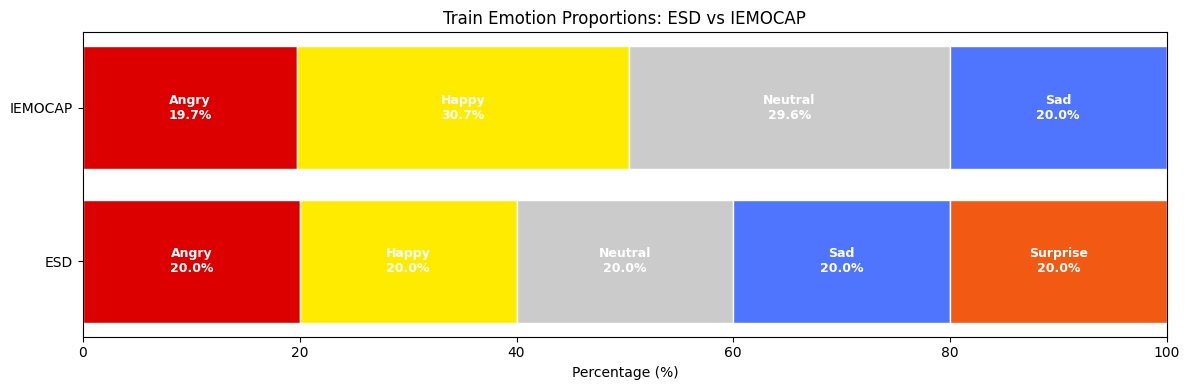

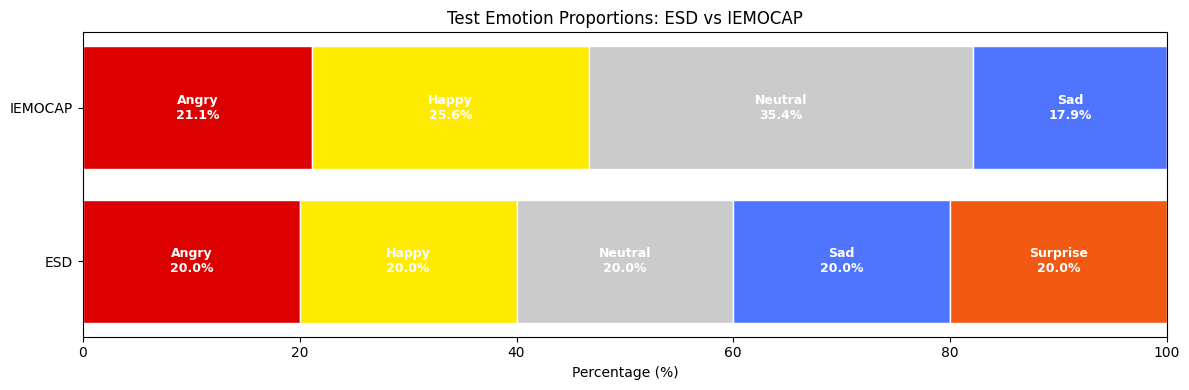

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Inside Out emotion color palette
emotion_colors = {
    "Angry":    "#DC0000",   # Anger (red)
    "Happy":    "#FFEB00",   # Joy (yellow)
    "Sad":      "#4F75FF",   # Sadness (blue)
    "Neutral":  "#CBCBCB",   # Disgust-ish neutral (gray)
    "Surprise": "#F25912"    # Fear/Surprise (orange)
}

def compute_counts(dataset):
    labels = [item["emo"] for item in dataset.data_list]
    return Counter(labels)


# TRAIN COUNTS
esd_train_counts = compute_counts(esd_train)
iem_train_counts = compute_counts(iemocap_train)

# TEST COUNTS
esd_test_counts = compute_counts(esd_test)
iem_test_counts = compute_counts(iemocap_test)


def counts_to_percentages(counts, emotions):
    total = sum(counts.values())
    return [(counts.get(e, 0) / total) * 100 for e in emotions]


def plot_stacked_bar(esd_counts, iem_counts, title):
    """Generic function for stacked horizontal bar charts comparing ESD vs IEMOCAP."""

    all_emotions = sorted(set(list(esd_counts.keys()) + list(iem_counts.keys())))

    # Convert to percentages
    esd_percent = counts_to_percentages(esd_counts, all_emotions)
    iem_percent = counts_to_percentages(iem_counts, all_emotions)

    datasets = ["ESD", "IEMOCAP"]
    percent_matrix = [esd_percent, iem_percent]

    fig, ax = plt.subplots(figsize=(12, 4))

    left = np.zeros(len(datasets))

    # Plot each emotion segment
    for i, emo in enumerate(all_emotions):
        values = [percent_matrix[d][i] for d in range(len(datasets))]

        bars = ax.barh(
            datasets,
            values,
            left=left,
            color=emotion_colors.get(emo, "#7f8c8d"),
            edgecolor="white"
        )

        # Add emotion + percentage inside each segment if >1%
        for bar, val in zip(bars, values):
            if val > 1:
                ax.text(
                    bar.get_x() + bar.get_width()/2,
                    bar.get_y() + bar.get_height()/2,
                    f"{emo}\n{val:.1f}%",
                    ha="center", va="center",
                    fontsize=9, color="white", weight="bold"
                )

        left += values

    ax.set_xlabel("Percentage (%)")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


# ------------------- TRAIN STACKED BAR -------------------
plot_stacked_bar(esd_train_counts, iem_train_counts,
                 "Train Emotion Proportions: ESD vs IEMOCAP")

# ------------------- TEST STACKED BAR -------------------
plot_stacked_bar(esd_test_counts, iem_test_counts,
                 "Test Emotion Proportions: ESD vs IEMOCAP")

### Waveform Exploration (One Sample per Emotion)

To visually understand the acoustic shape of each emotion, we plot the raw
waveform for one random example per emotion from IEMOCAP.

Waveforms reveal:

- loudness variations  
- silence patterns  
- sharpness of emotional expression  
- differences in emotional energy  

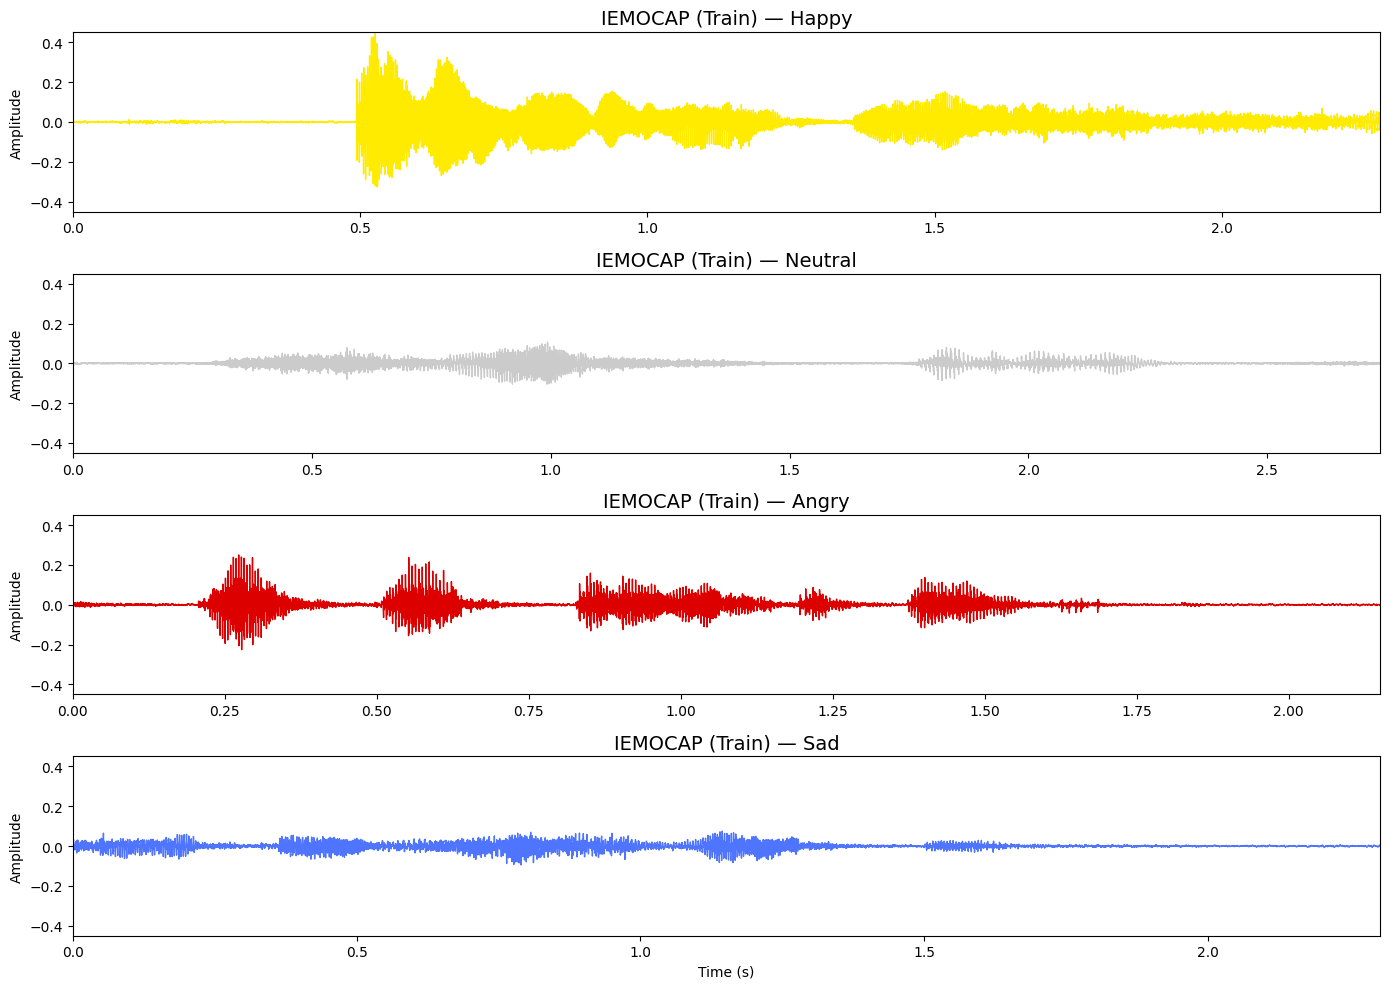

In [ ]:
import os
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display

# Emotion colors
emotion_colors = {
    "Angry":    "#DC0000",
    "Happy":    "#FFEB00",
    "Sad":      "#4F75FF",
    "Neutral":  "#CBCBCB",
    "Surprise": "#F25912"
}

# ---------------------------------------------------------
# Helper: Pick 1 sample per emotion
# ---------------------------------------------------------
def pick_one_sample_per_emotion(dataset):
    samples = {}
    for item in dataset.data_list:
        emo = item["emo"]
        if emo not in samples:
            samples[emo] = item
    return samples

# ---------------------------------------------------------
# Helper: Load waveform and compute time axis
# ---------------------------------------------------------
def load_waveform(item):
    wav_path = os.path.join(data_dir, item["wav"])
    y, sr = sf.read(wav_path)
    t = np.linspace(0, len(y)/sr, num=len(y))
    return y, sr, t

# ---------------------------------------------------------
# Plot waveforms with shared Y-axis
# ---------------------------------------------------------
def plot_shared_waveforms(sample_dict, dataset_name):
    emos = list(sample_dict.keys())
    n = len(emos)

    # Load all waveforms first to compute global y-axis limits
    waveforms = {}
    y_max = 0
    for emo in emos:
        y, sr, t = load_waveform(sample_dict[emo])
        waveforms[emo] = (y, sr, t)
        y_max = max(y_max, abs(y).max())

    # Plot
    fig, axes = plt.subplots(n, 1, figsize=(14, 2.5*n), sharey=True)

    for i, emo in enumerate(emos):
        ax = axes[i] if n > 1 else axes
        y, sr, t = waveforms[emo]

        ax.plot(t, y, color=emotion_colors.get(emo, "#333"), linewidth=1)
        ax.set_title(f"{dataset_name} — {emo}", fontsize=14)
        ax.set_xlim(0, t[-1])
        ax.set_ylabel("Amplitude")
        ax.set_ylim(-y_max, y_max)  # shared y-axis limits

    axes[-1].set_xlabel("Time (s)")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------
# Apply to IEMOCAP
# ---------------------------------------------------------

iem_samples = pick_one_sample_per_emotion(iemocap_train)
plot_shared_waveforms(iem_samples, "IEMOCAP (Train)")

Using the same y-axis for all emotions lets us directly compare how strong or soft the speech is.
Here’s what the waveforms show:

**Happy**

Medium-to-high loudness

Energetic and lively shape

Not as intense as Angry, but clearly expressive

→ Happy sounds bright and active.

**Neutral**

Lowest loudness overall

Very stable, smooth waveform

Almost no strong emotional changes

→ Neutral sounds calm and flat.

**Angry**

Highest peaks among all emotions

Very strong, sharp bursts of energy

Almost no silence, continuous intensity

→ Angry is the loudest and most forceful.

**Sad**

Low-to-medium loudness

Smooth, soft shape

Slower and more gentle compared to Happy/Angry

→ Sad sounds quiet and subdued.

**Overall**

emotional intensity ranking is Angry > Happy > Sad > Neutral.

### Duration Analysis (Train + Test)

Here, we compare duration distributions within each dataset:

- **ESD Train vs ESD Test** share the *same* y-axis limits.
- **IEMOCAP Train vs IEMOCAP Test** share the *same* y-axis limits.

This keeps comparisons fair *within* a dataset, while avoiding misleading
comparisons *between* datasets (which differ greatly in size).

All histograms use:
- 20 equal-width bins (shared bin edges)
- Shared x-range across all charts
- Dataset-consistent coloring

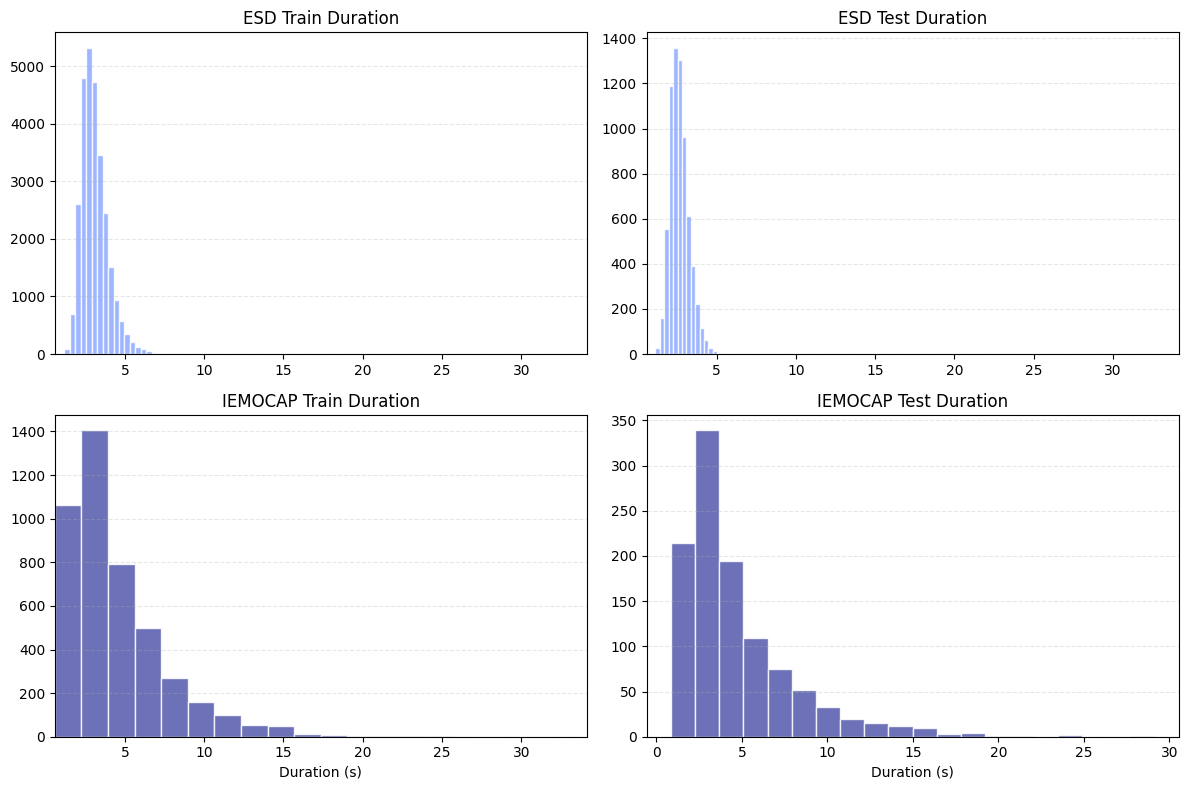

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Utility to extract durations
def get_durations(dataset):
    return np.array([item["length"] for item in dataset.data_list], dtype=float)

# Extract durations
esd_train_dur = get_durations(esd_train)
esd_test_dur  = get_durations(esd_test)
iem_train_dur = get_durations(iemocap_train)
iem_test_dur  = get_durations(iemocap_test)

# Colors for datasets
esd_color = "#8CA9FF"
iem_color = "#5459AC"

# Global duration range (shared x-axis)
all_durations = np.concatenate([
    esd_train_dur, esd_test_dur,
    iem_train_dur, iem_test_dur
])
xmin, xmax = all_durations.min(), all_durations.max()

# Shared bins across all histograms (20 bins)
bins = np.linspace(xmin*0.9, xmax*1.1, 21)


# --- Compute dataset-wise y-axis limits ---
# ESD max y
esd_train_counts, _ = np.histogram(esd_train_dur, bins=bins)
esd_test_counts, _  = np.histogram(esd_test_dur, bins=bins)
esd_ymax = max(esd_train_counts.max(), esd_test_counts.max())

# IEMOCAP max y
iem_train_counts, _ = np.histogram(iem_train_dur, bins=bins)
iem_test_counts, _  = np.histogram(iem_test_dur, bins=bins)
iem_ymax = max(iem_train_counts.max(), iem_test_counts.max())


# --- Plot 2×2 grid ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
hist_config = dict(bins=20, alpha=0.85, edgecolor="white")

# Row 1: ESD
axes[0, 0].hist(esd_train_dur, color=esd_color, **hist_config)
axes[0, 0].set_title("ESD Train Duration")
axes[0, 0].set_xlim(xmin, xmax)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.3)

axes[0, 1].hist(esd_test_dur, color=esd_color, **hist_config)
axes[0, 1].set_title("ESD Test Duration")
axes[0, 1].set_xlim(xmin, xmax)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.3)


# Row 2: IEMOCAP
axes[1, 0].hist(iem_train_dur, color=iem_color, **hist_config)
axes[1, 0].set_title("IEMOCAP Train Duration")
axes[1, 0].set_xlim(xmin, xmax)
axes[1, 0].set_xlabel("Duration (s)")
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.3)

axes[1, 1].hist(iem_test_dur, color=iem_color, **hist_config)
axes[1, 1].set_title("IEMOCAP Test Duration")
axes[1, 1].set_xlabel("Duration (s)")
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### Gender Analysis for IEMOCAP

IEMOCAP does not include a `gender` field inside the EmoBox metadata,  
but gender can be reliably inferred from the raw audio filenames.

Example filename:
Ses02F_impro07_F001.wav

The letter `F` (or `M`) immediately after the session number indicates  
the actor's gender.

This section extracts gender labels from filenames and computes:
- Gender distribution in IEMOCAP
- Emotion × gender distribution

Note:  
ESD does **not** contain speaker or gender information, so this analysis  
applies only to **IEMOCAP**.

In [22]:
import os
from collections import Counter, defaultdict

def get_labels(dataset):
    return [item["emo"] for item in dataset.data_list]

def get_lengths(dataset):
    return [item["length"] for item in dataset.data_list]

# -------------------------------------------------------------
# 1) Infer gender from IEMOCAP filename
# -------------------------------------------------------------

def infer_gender_from_wavpath(wav_path):
    """
    Extracts gender from IEMOCAP wav filename.

    Example: Ses02F_impro07_F001.wav
                     ^
    """
    filename = os.path.basename(wav_path)

    # IEMOCAP pattern: Ses??<Gender>
    # Example: 'Ses02F_impro07_F001.wav' -> gender letter = 'F'
    session_prefix = filename.split('_')[0]  # 'Ses02F'
    gender_letter = session_prefix[-1]       # 'F'

    if gender_letter.upper() == "F":
        return "Female"
    elif gender_letter.upper() == "M":
        return "Male"
    else:
        return "Unknown"


# -------------------------------------------------------------
# 2) Collect gender labels for IEMOCAP train/test/val
# -------------------------------------------------------------

def add_gender_to_dataset(dataset):
    return [infer_gender_from_wavpath(item["wav"]) for item in dataset.data_list]

iem_train_gender = add_gender_to_dataset(iemocap_train)
iem_test_gender  = add_gender_to_dataset(iemocap_test)
iem_val_gender   = add_gender_to_dataset(iemocap_val)

# -------------------------------------------------------------
# 3) Gender distribution
# -------------------------------------------------------------

def gender_distribution(genders, name):
    counts = Counter(genders)
    total  = len(genders)

    print(f"\n===== Gender Distribution: {name} =====")
    for g, c in counts.items():
        print(f"{g:10s}: {c:5d} ({c/total*100:5.2f}%)")
    return counts

gender_distribution(iem_train_gender, "IEMOCAP Train")
gender_distribution(iem_test_gender,  "IEMOCAP Test")
gender_distribution(iem_val_gender,   "IEMOCAP Val")

# -------------------------------------------------------------
# 4) Emotion × Gender distribution
# -------------------------------------------------------------

def emotion_by_gender_iemocap(dataset, name):
    genders = add_gender_to_dataset(dataset)
    emos    = get_labels(dataset)

    joint = defaultdict(Counter)
    for g, e in zip(genders, emos):
        joint[g][e] += 1

    print(f"\n===== Emotion × Gender ({name}) =====")
    for g, emo_counts in joint.items():
        total_g = sum(emo_counts.values())
        print(f"\nGender: {g}  (n={total_g})")
        for emo, cnt in emo_counts.items():
            print(f"  {emo:10s}: {cnt:5d} ({cnt/total_g*100:5.2f}%)")

    return joint

emotion_by_gender_iemocap(iemocap_train, "IEMOCAP Train")


===== Gender Distribution: IEMOCAP Train =====
Female    :  2238 (50.55%)
Male      :  2189 (49.45%)

===== Gender Distribution: IEMOCAP Test =====
Female    :   507 (46.73%)
Male      :   578 (53.27%)

===== Gender Distribution: IEMOCAP Val =====

===== Emotion × Gender (IEMOCAP Train) =====

Gender: Female  (n=2238)
  Happy     :   703 (31.41%)
  Neutral   :   685 (30.61%)
  Angry     :   408 (18.23%)
  Sad       :   442 (19.75%)

Gender: Male  (n=2189)
  Happy     :   655 (29.92%)
  Sad       :   445 (20.33%)
  Neutral   :   624 (28.51%)
  Angry     :   465 (21.24%)


defaultdict(collections.Counter,
            {'Female': Counter({'Happy': 703,
                      'Neutral': 685,
                      'Angry': 408,
                      'Sad': 442}),
             'Male': Counter({'Happy': 655,
                      'Sad': 445,
                      'Neutral': 624,
                      'Angry': 465})})

### Gender Distribution and Emotion × Gender Analysis (IEMOCAP)

We visualize two aspects:

1. **Gender Distribution (Train and Test Splits)**  
   A bar chart showing how many male and female samples appear in each split.

2. **Emotion × Gender Heatmap (Train Split)**  
   This is a *cross-tabulation heatmap*, where:
   - Rows represent emotions  
   - Columns represent genders  
   - Cell values represent the number of samples  
   
   The heatmap shows how emotions are distributed across genders in the dataset.

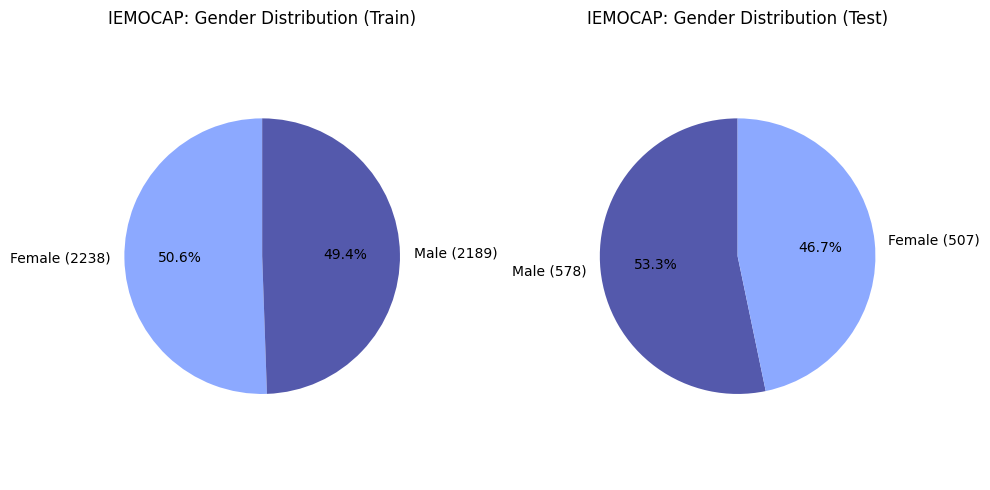

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------------------
# Prepare DataFrames for Train & Test
# -----------------------------------------

def build_iemocap_gender_df(dataset):
    genders = add_gender_to_dataset(dataset)
    emos = get_labels(dataset)
    lengths = get_lengths(dataset)

    return pd.DataFrame({
        "gender": genders,
        "emotion": emos,
        "duration": lengths
    })

iem_train_df = build_iemocap_gender_df(iemocap_train)
iem_test_df  = build_iemocap_gender_df(iemocap_test)

# -----------------------------------------
# 1) Gender Distribution Pie Charts (Train + Test)
# -----------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Colors
gender_colors = {
    "Female": "#8CA9FF",
    "Male": "#5459AC",
    "Unknown": "#CCCCCC"
}

# --- TRAIN ---
train_counts = iem_train_df["gender"].value_counts()
train_labels = [f"{g} ({train_counts[g]})" for g in train_counts.index]
train_sizes  = train_counts.values
train_colors = [gender_colors[g] for g in train_counts.index]

axes[0].pie(
    train_sizes,
    labels=train_labels,
    autopct="%1.1f%%",
    colors=train_colors,
    startangle=90,
    textprops={'color': 'black'}
)
axes[0].set_title("IEMOCAP: Gender Distribution (Train)")
axes[0].axis("equal")

# --- TEST ---
test_counts = iem_test_df["gender"].value_counts()
test_labels = [f"{g} ({test_counts[g]})" for g in test_counts.index]
test_sizes  = test_counts.values
test_colors = [gender_colors[g] for g in test_counts.index]

axes[1].pie(
    test_sizes,
    labels=test_labels,
    autopct="%1.1f%%",
    colors=test_colors,
    startangle=90,
    textprops={'color': 'black'}
)
axes[1].set_title("IEMOCAP: Gender Distribution (Test)")
axes[1].axis("equal")

plt.tight_layout()
plt.show()

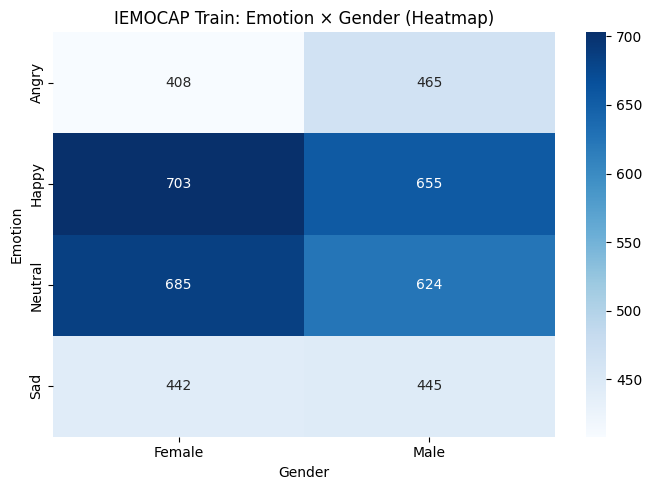

In [30]:
# -----------------------------------------
# 2) Emotion × Gender Heatmap (Train)
# -----------------------------------------

pivot = pd.crosstab(iem_train_df["emotion"], iem_train_df["gender"])

plt.figure(figsize=(7,5))
sns.heatmap(pivot, annot=True, fmt="d", cmap="Blues")
plt.title("IEMOCAP Train: Emotion × Gender (Heatmap)")
plt.ylabel("Emotion")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

### **Data Anonymity & Privacy Protection**

Even though IEMOCAP and ESD do not provide personal identifiers (names, addresses), audio *is itself a biometric identifier*.
A person’s voice can reveal:

* gender
* age
* emotional state
* identity (voiceprint)

#### ✔ What we do to mitigate:

* We **do not store or share raw audio** beyond the project environment.
* We **do not attempt speaker re-identification** (e.g., matching voices to real people).
* We store data **only on secure university/Google Drive environments**, not on personal local machines.
* We ensure no audio samples are shared in the report or slides unless allowed and anonymized.

#### ✔ Risk Level: Low–Medium

#### ✔ Mitigation: Do not expose audio; keep it internal to the coding environment.

---

### **Bias, Fairness & Representativeness**

Emotion datasets often contain:

* imbalanced emotion classes
* actor-based biases
* cultural biases (ESD = Mandarin, IEMOCAP = American English)
* gender imbalance
* exaggerated, “performed” emotions

This affects fairness and model generalization.

#### ✔ What we do to mitigate:

During Data Exploration we:

* measured **emotion distribution imbalance**
* analyzed **gender distribution** (for IEMOCAP)
* compared **mean durations**, amplitude, etc.
* identified **underrepresented classes** (e.g., Sad, Neutral imbalance)
* documented these biases in the risk assessment
* plan to **report model bias** in the evaluation phase (not hide it)

#### ✔ Risk Level: Medium

#### ✔ Mitigation: Acknowledge dataset limitations, avoid overclaiming model fairness.

---

### **Sensitive Attributes & Fair Use**

Gender is inferred from filenames in IEMOCAP (F/M).
This could be seen as sensitive if misused.

#### ✔ What we do to mitigate:

* We do **not** use gender for classification.
* We use gender **only to detect potential dataset biases**.
* We document clearly that gender = *synthetic metadata* inferred from filename conventions (not private info).
* We do **not** attempt to predict gender from audio.

#### ✔ Risk Level: Low

#### ✔ Mitigation: Use gender solely for bias detection.

---

### **Transparency & Dataset Provenance**

Both IEMOCAP and ESD are:

* academic datasets
* published with consent
* intended for emotion research

But transparency is still required.

#### ✔ What we do to mitigate:

We document:

* where datasets come from
* what licensing terms they carry
* that the participants provided consent
* that we do not redistribute or modify data unlawfully

#### ✔ Risk Level: Low

#### ✔ Mitigation: Follow dataset licenses properly.

---

### **Prevent Misuse of Emotion Recognition**

Emotion recognition has **high misuse potential**:

* surveillance
* manipulation
* workplace monitoring
* mental health profiling

Even though your project is academic, it’s important to show responsibility.

#### ✔ What we do to mitigate:

* Clearly define the **scope** of the project as *research-only*.
* State that the system is **not** trained for deployment or real-world inference.
* Emphasize that emotional predictions do **not** reflect internal mental states—only acoustic patterns.

#### ✔ Risk Level: High (for real-world use)

#### ✔ Mitigation: Restrict to academic, controlled use only.

---

### **Secure Storage & Access Control**

During Data Exploration, many files are generated:

* metadata
* waveforms
* plots
* derived features

These must be handled properly.

#### ✔ What we do to mitigate:

* Store all data in **restricted Google Drive folders**
* Limit access to the project team only
* Do not store raw audio on GitHub (only code and metadata allowed)
* Use `.gitignore` for data directories

#### ✔ Risk Level: Low

#### ✔ Mitigation: Access control and no data leakage.

---

### **Responsible Visualization**

Waveforms and spectrograms **should not expose identifiable content**:

* No transcripts containing sensitive content
* No audio playback in the report unless allowed
* No full-length audio published
* No emotional conclusions from single samples (“this is definitively Angry”)

#### ✔ What we do to mitigate:

* Use **short segments** or **random samples** without semantic content
* Never label individuals
* Include disclaimers when visualizing emotional audio (“sample for illustration only”)

#### ✔ Risk Level: Low

#### ✔ Mitigation: Show only what is strictly necessary.

---

### **Short Summary (What We Did + Why)**

During Data Exploration, we addressed ethics and privacy by:

* Ensuring anonymity and secure handling of raw audio
* Assessing dataset imbalance and potential bias
* Using gender information only for fairness analysis
* Respecting dataset licenses and participant consent
* Restricting emotional inference to academic research
* Avoiding the public release of identifiable audio
* Maintaining responsible communication of findings

These steps reduce the risk of harm, privacy violations, or misuse of our MER system.